In [2]:
import numpy as np
import pandas as pd

In [3]:
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [4]:
train = pd.read_csv(r'train.csv')

In [5]:
test = pd.read_csv(r'test.csv')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#Figure out what data types are  in there 
dtypes = []
for i in train:
    #print(train[i].dtype)
    if train[i].dtype not in dtypes: 
        dtypes.append(train[i].dtype)

In [8]:
print(dtypes)

[dtype('int64'), dtype('O'), dtype('float64')]


In [9]:
quantitaive_dtype = ['int64', 'float64']

In [10]:
quantitative_data = []
for i in train.columns:
    if train[i].dtype in quantitaive_dtype:
        quantitative_data.append(i)

In [11]:
train_noid = train.drop(columns='Id')

In [12]:
test_noid = test.drop(columns='Id')

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
Id = test['Id']

In [18]:
import matplotlib.pyplot as plt

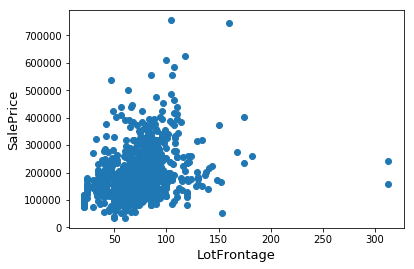

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = train['LotFrontage'], y = train['SalePrice'])
plt.xlabel('LotFrontage', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()

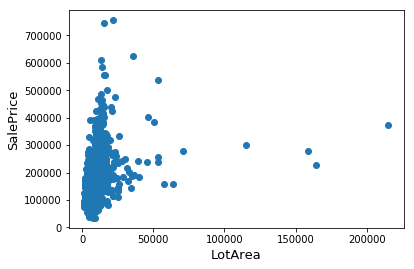

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = train['LotArea'], y = train['SalePrice'])
plt.xlabel('LotArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()

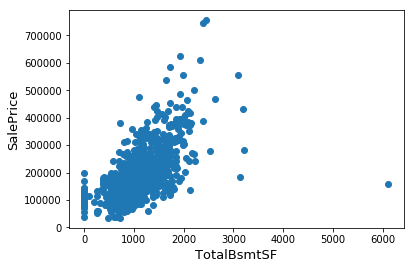

In [26]:
fig, ax = plt.subplots()
ax.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()

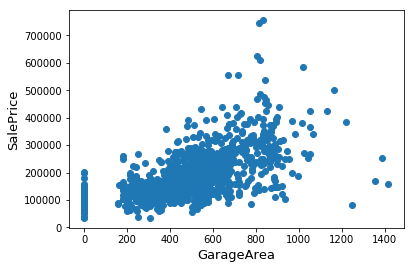

In [27]:
fig, ax = plt.subplots()
ax.scatter(x = train['GarageArea'], y = train['SalePrice'])
plt.xlabel('GarageArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()

In [29]:
import seaborn as sns

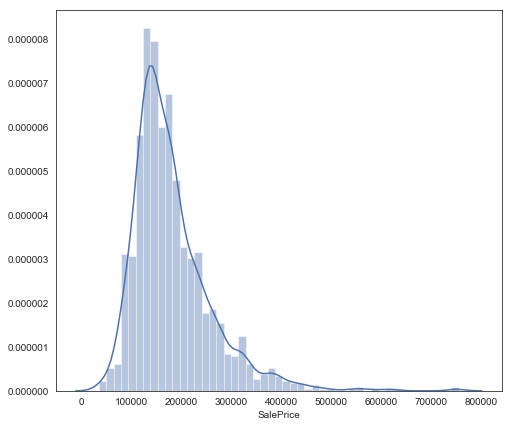

In [30]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new dist)ribution 
sns.distplot(train['SalePrice'] , color="b")

#outlier threshold is 700000

In [32]:
from scipy.stats import norm, skew

In [33]:
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 180921.20 and sigma = 79415.29



In [35]:
from scipy import stats

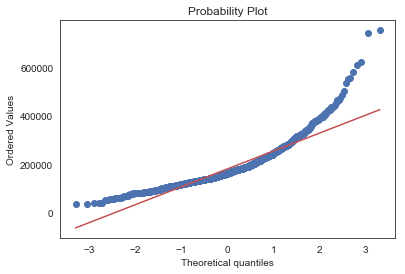

In [36]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [37]:
train["SalePrice"] = np.log1p(train["SalePrice"])

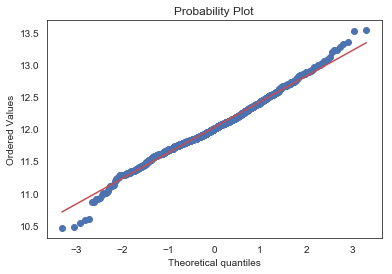

In [38]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

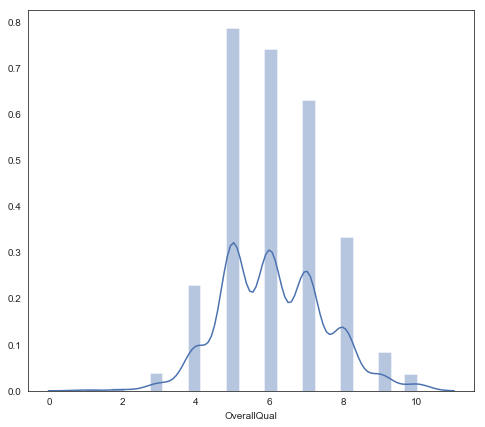

In [607]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new dist)ribution 
sns.distplot(train['OverallQual'] , color="b")

#outlier threshold is 700000

In [41]:
df = pd.concat((train_noid.loc[:,'MSSubClass':'SaleCondition'], test_noid.loc[:,'MSSubClass':'SaleCondition']))

In [40]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


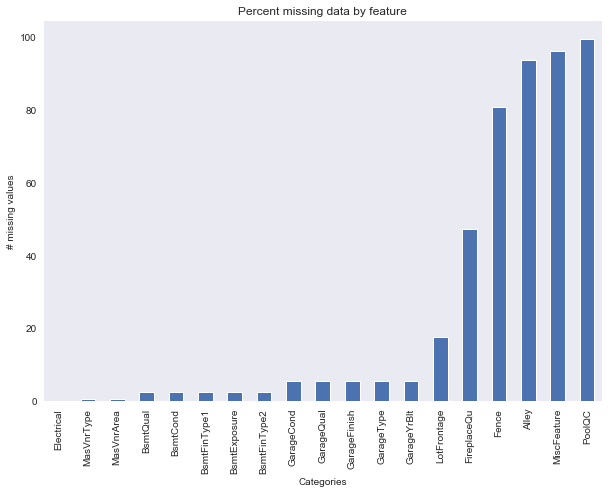

In [42]:
#Figure ot what columns have what missing values 
sns.set_style("dark")
f, ax = plt.subplots(figsize=(10, 7))
sns.set_color_codes(palette='deep')
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
ax.xaxis.grid(False)
ax.set(ylabel="# missing values")
ax.set(xlabel="Categories")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

In [636]:
#drop categories where most of the values are missing, and then im;pute the rest 

In [43]:
df_no_missing = df.drop(['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis=1)

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
my_imputer = SimpleImputer()

In [46]:
#encode with one hot encoding 

In [47]:
#creating matrices for sklearn:
X_train = data_with_imputed_values[:train.shape[0]]
X_test = data_with_imputed_values[train.shape[0]:]
y = train.SalePrice

NameError: name 'data_with_imputed_values' is not defined

In [49]:
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)

NameError: name 'one_hot_encoded_training_predictors' is not defined

In [687]:
new_data = df.to_numpy()

In [688]:
predictors_without_categoricals = df.select_dtypes(exclude=['object'])

In [693]:
categoricals = df.select_dtypes(['object'])

In [694]:
categoricals.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [51]:
X_train = pd.DataFrame(X_train)

NameError: name 'X_train' is not defined

In [52]:
one_hot_encoded_test_predictors = pd.get_dummies(categoricals)

NameError: name 'categoricals' is not defined

In [53]:
one_hot_encoded_test_predictors

NameError: name 'one_hot_encoded_test_predictors' is not defined

In [658]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()

In [50]:
data_with_imputed_values = my_imputer.fit_transform(predictors_without_categoricals)

NameError: name 'predictors_without_categoricals' is not defined

In [704]:
categoricals = pd.DataFrame(data_with_imputed_values)

In [707]:
categoricals.shape

(2919, 36)

In [705]:
quant = pd.DataFrame(one_hot_encoded_test_predictors)

In [708]:
quant.shape

(2919, 252)

In [ ]:
pd.concat([quant, categoricals], axis=0)

In [480]:
y = np.asarray(y)

In [481]:
np.shape(y)

(1460,)

In [648]:
predictors_without_categoricals.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008


In [649]:
pd.set_option('display.max_columns', None)

In [650]:
one_hot_encoded_training_predictors = pd.get_dummies(X_train)

Exception: Data must be 1-dimensional

In [489]:
one_hot_encoded_test_predictors.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,20.0,11622.0,5.0,6.0,1961.0,1961.0,896.0,0.0,0.0,896.0,1.0,0.0,2.0,1.0,5.0,0.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
1,20.0,14267.0,6.0,6.0,1958.0,1958.0,1329.0,0.0,0.0,1329.0,1.0,1.0,3.0,1.0,6.0,0.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
2,60.0,13830.0,5.0,5.0,1997.0,1998.0,928.0,701.0,0.0,1629.0,2.0,1.0,3.0,1.0,6.0,1.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
3,60.0,9978.0,6.0,6.0,1998.0,1998.0,926.0,678.0,0.0,1604.0,2.0,1.0,3.0,1.0,7.0,1.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
4,120.0,5005.0,8.0,5.0,1992.0,1992.0,1280.0,0.0,0.0,1280.0,2.0,0.0,2.0,1.0,5.0,0.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0


In [ ]:
# what features are correlated? 

In [566]:
corr = X_train.corr()

In [490]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [491]:
linear = LinearRegression()

In [492]:
linear.fit(final_train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [493]:
test_prediction = linear.predict(final_test)

In [494]:
train_prediction = linear.predict(final_train)

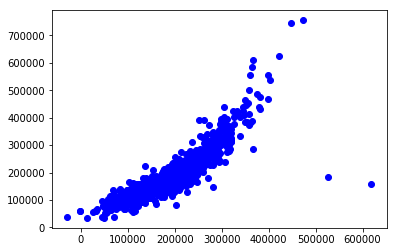

In [495]:
plt.scatter(train_prediction, y, c = "blue",  label = "Training data")
#plt.scatter(test_prediction, y, c = "black",  label = "Validation data")

In [496]:
test_prediction

array([129515.19614315, 155320.03046512, 174245.35446333, ...,
       162099.23642439, 123935.07387553, 245184.43231219])

In [568]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 
 1.0, 10.0, 100, 1000, 10000]}

In [569]:
ridge = Ridge()

In [570]:
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(final_train, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100,
                                   1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [571]:
model_cv.fit(final_train, y) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100,
                                   1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [572]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-22966.386023306684


In [573]:
params = {'alpha': [80, 90, 100, 110, 120, 130, 140, 150, 200, 300]}

In [574]:
ridge = Ridge()

In [575]:
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(final_train, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [80, 90, 100, 110, 120, 130, 140, 150, 200,
                                   300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [505]:
model_cv.fit(final_train, y) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [80, 90, 100, 110, 120, 130, 140, 150, 200,
                                   300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [506]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 200}
-22926.296489710487


In [576]:
cv_results = pd.DataFrame(model_cv.cv_results_)

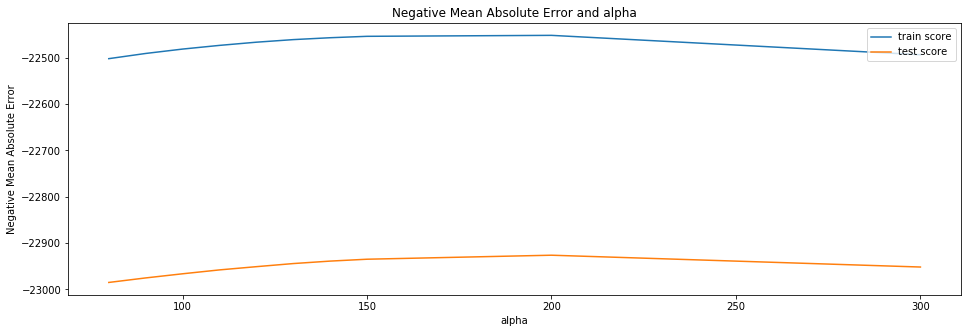

In [577]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [578]:
#final ridge model
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(final_train, y)
ridge.coef_

array([-1.69092990e+02,  5.26486452e-01,  1.72979157e+04,  4.38831333e+03,
        5.69037660e+02,  1.97065998e+02,  3.76924915e+01,  1.77871725e+01,
       -1.37693741e+01,  4.17102899e+01, -8.45430786e+02, -5.95848491e+02,
       -8.72271037e+03, -2.90294368e+03,  2.41247015e+03,  3.94672251e+03,
        3.69159755e+01,  5.47493036e+00,  2.07359732e+01,  2.15457637e+01,
        7.16584836e+01, -4.06152983e+01, -1.45221476e+00, -1.89140133e+02,
       -6.91265743e+02])

In [579]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(final_train)
print(metrics.r2_score(y_true=y, y_pred=y_train_pred))

0.790405832176658


In [582]:
#lets predict the R-squared value of test and train data
y_test_pred = ridge.predict(final_test)
#print(metrics.r2_score(y_true=y, y_pred=y_test_pred))

In [583]:
y_test_pred

array([127533.13596539, 154185.74972963, 180576.69617307, ...,
       165959.53976091, 125767.37047401, 241076.2605467 ])

In [511]:
#RIDGE REGULARIZATION

# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

SyntaxError: invalid syntax (<ipython-input-511-b11f20001e9b>, line 1)

In [512]:
from sklearn.linear_model import Lasso

In [435]:
from sklearn.model_selection import GridSearchCV

In [436]:
lasso = Lasso()
lasso.fit(X_train,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [437]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [513]:
#lasso
params = {'alpha': [0.00005, 0.0001, .0005, 0.001, 0.008, .01, .05, .1, 100, 800, 850, 900, 950, 1000]}
lasso = Lasso()


In [514]:
folds = 5

In [660]:

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=850, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [80, 90, 100, 110, 120, 130, 140, 150, 200,
                                   300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [661]:
# cv results
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)

In [662]:
model_cv_l

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=850, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [80, 90, 100, 110, 120, 130, 140, 150, 200,
                                   300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [663]:
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)

In [664]:
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 200}
-23106.506594837767


In [666]:
#final lasso model
alpha = 200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y)

Lasso(alpha=200, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [667]:
from sklearn.metrics import mean_squared_error

In [668]:
from sklearn import metrics

In [669]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y, y_pred=y_train_pred))

0.7923737972056821


In [299]:

train_score=lasso.score(X_train,y_train)

coeff_used = np.sum(lasso.coef_!=0)

NameError: name 'y_train' is not defined

In [375]:
len(test_prediction)

1459

In [376]:
dictionary = []

In [377]:
for i in range(0, 1459)

SyntaxError: invalid syntax (<ipython-input-377-b2ecd682b419>, line 1)

In [673]:
file = open('test_prediction.csv', 'w', newline ='') 

In [674]:
header = ['Id', "SalePrice"] 

In [675]:
import csv
writer = csv.DictWriter(file, fieldnames = header)

In [676]:
writer.writeheader() 

In [679]:
for i in range(0, 1459):
    writer.writerow({'Id': Id[i],
                   'SalePrice' : y_test_pred[i]})

ValueError: I/O operation on closed file.

In [680]:
file.close()

In [35]:
import seaborn as sns

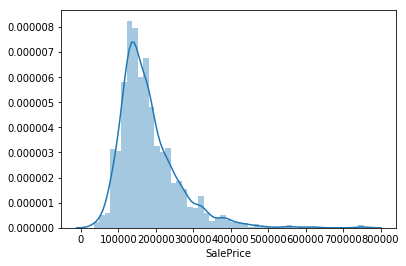

In [37]:
sns.distplot(df['SalePrice'])

In [538]:
# how skewed are the distribution? 
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


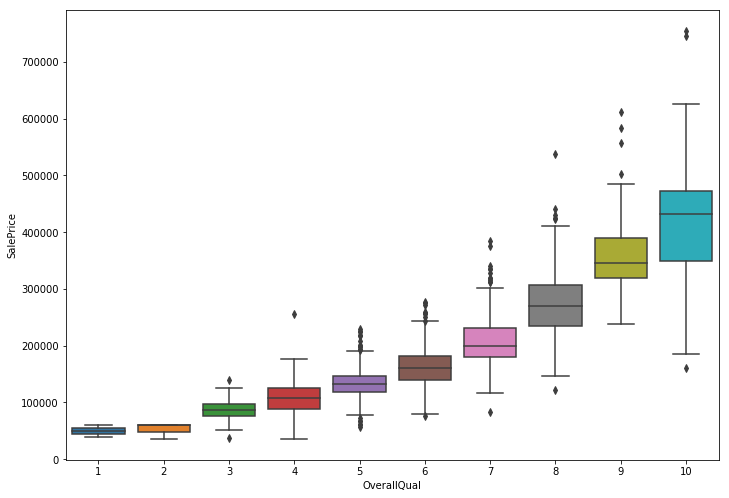

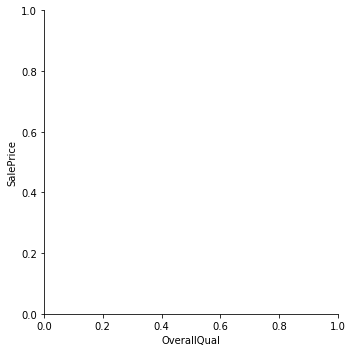

In [38]:
#Are better houses more expensive? 

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.catplot(x="OverallQual", y="SalePrice", kind="box", data=df, ax=ax)

#Within a category, dark, light and water type digimon tend to have the highest spirit, while fire types tend to have the lowest. 
#This indicates that dark, light and water digimon tend to occupy the magic user niche. 

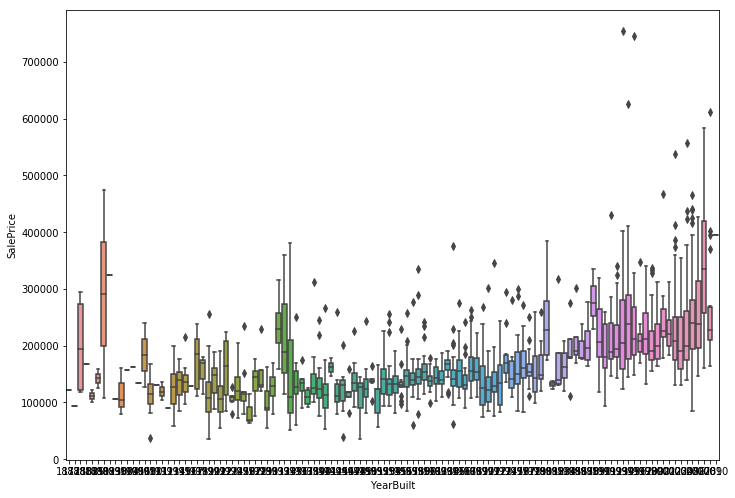

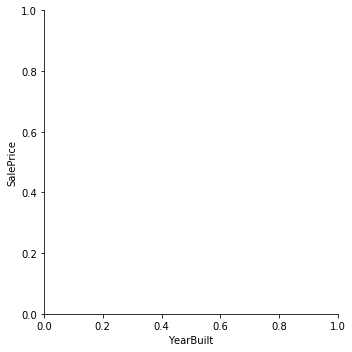